In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
def find_alg_type(df: pd.DataFrame):
    """Takes a df or pandsas groupby and find if the core length are equal"""

    if df[df["parameter"] == "core_min"].value.iloc[0]:
        min_len = float(df[df["parameter"] == "core_min"].value.iloc[0])
        max_len = float(df[df["parameter"] == "core_max"].value.iloc[0])
        return "fixed" if min_len - max_len == 0 else "variable"
    else:
        return "meme"


In [2]:
config_file = "../data/process/benchmark_results/benchmark_config.csv"

config_dat = pd.read_csv(config_file, index_col=0)
# fill with nonsense for meme
config_dat = pd.concat([config_dat, pd.DataFrame({"config_id": ["meme_results","meme_results"], "parameter": ['core_min', 'core_max'],"value" : [None, None]})])
dat = pd.read_csv("../data/process/benchmark_results/benchmark_results.csv")

alg_type = (config_dat.groupby("config_id").apply(
    find_alg_type
))
alg_type.name = "alg_type"
config_dat = config_dat.join(alg_type, on='config_id')

dat_algtype = (config_dat
    .filter(['config_id', 'alg_type'])
    .merge(dat, left_on='config_id', right_on='algorithm', how="left")
)
dat_algtype = dat_algtype.drop_duplicates(['config_id', 'imodulon'])


In [3]:
p = (ggplot(dat_algtype, aes(x='alg_type', y="pssm_pssm"))+
    geom_boxplot( outlier_size=-1)+
    geom_jitter(aes(color = "imodulon"))+
    facet_grid("~imodulon", scales = "free_y")+
    scale_color_discrete(guide=False)+
    xlab("Algorithm") +
    ylab("PSSM-PSSM score") +
    theme(figure_size=(8, 3), axis_text_x=element_text(rotation=45))
)
p

p.save("../figs/benchmark/boxplot.png")

/Users/s143838/projects/macarom/.venv_macarom/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 3 in image.
/Users/s143838/projects/macarom/.venv_macarom/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../figs/benchmark/boxplot.png
/Users/s143838/projects/macarom/.venv_macarom/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/s143838/projects/macarom/.venv_macarom/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


## Find the best performing parameter configuration for each motif

In [4]:
dat.groupby("imodulon").apply(lambda x: x[x["pssm_pssm"] == x["pssm_pssm"].min()]['algorithm'])

imodulon     
CysB      123    output_1655481696.7676134
GcvA      36      output_1655796618.478556
MalT      85     output_1655480830.3259234
NarL      124    output_1655481696.7676134
TyrR      37      output_1655796618.478556
Name: algorithm, dtype: object

## Plot pssm_pssm score vs beta

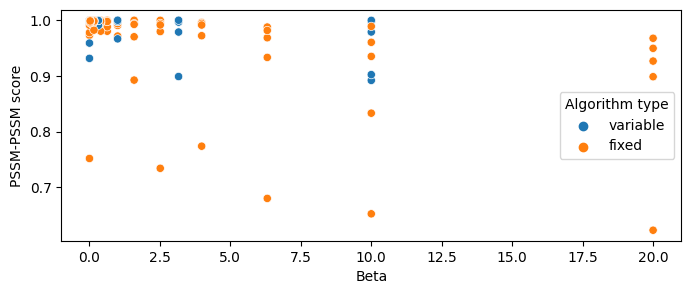

In [12]:
dat
config_dat
plot_dat = pd.merge(dat, config_dat.query("parameter == 'beta'"), left_on='algorithm', right_on='config_id')
plot_dat["value"] = plot_dat["value"].astype(float)
plt.figure(figsize=(8, 3))
sns.scatterplot(data=plot_dat, x='value', y = "pssm_pssm", hue="alg_type")
plt.xlabel('Beta')
plt.ylabel('PSSM-PSSM score')
plt.legend(title = 'Algorithm type')
plt.savefig(fname="../figs/benchmark/pssm-score_vs_beta.png")

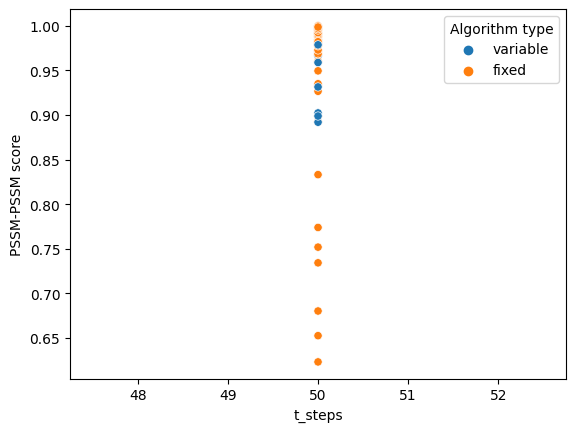

In [6]:
dat
config_dat
plot_dat = pd.merge(dat, config_dat.query("parameter == 't_steps'"), left_on='algorithm', right_on='config_id')
plot_dat["value"] = plot_dat["value"].astype(float)
sns.scatterplot(data=plot_dat, x='value', y = "pssm_pssm", hue="alg_type")
plt.xlabel('t_steps')
plt.ylabel('PSSM-PSSM score')
plt.legend(title = 'Algorithm type')

In [7]:
config_dat

,config_id,parameter,value,alg_type
0,output_1655479480.6906908,core_min,5,variable
1,output_1655479480.6906908,core_max,19,variable
2,output_1655479480.6906908,t_steps,50,variable
3,output_1655479480.6906908,iters_per_point,50,variable
4,output_1655479480.6906908,beta,0.03162277660168379,variable
...,...,...,...,...
3,output_1655479292.055203,iters_per_point,50,fixed
4,output_1655479292.055203,beta,0.025118864315095794,fixed
5,output_1655479292.055203,NTscoring,"[[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[...",fixed
0,meme_results,core_min,None,meme


In [8]:
dat_algtype[dat_algtype.pssm_pssm.duplicated()].sort_values("pssm_pssm", ascending=True)
dat_algtype

,config_id,alg_type,imodulon,algorithm,pssm_pssm
0,output_1655479480.6906908,variable,MalT,output_1655479480.6906908,0.993011
1,output_1655479480.6906908,variable,GcvA,output_1655479480.6906908,1.000000
2,output_1655479480.6906908,variable,TyrR,output_1655479480.6906908,0.999640
3,output_1655479480.6906908,variable,CysB,output_1655479480.6906908,0.997905
4,output_1655479480.6906908,variable,NarL,output_1655479480.6906908,0.999966
...,...,...,...,...,...
900,meme_results,meme,MalT,meme_results,0.999901
901,meme_results,meme,GcvA,meme_results,1.000000
902,meme_results,meme,TyrR,meme_results,1.000000
903,meme_results,meme,CysB,meme_results,1.000000
